In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2022,1,22)

In [3]:
aaron=web.DataReader("AARON.NS","yahoo",start, end)
escort=web.DataReader("ESCORTS.NS","yahoo",start, end)
tci=web.DataReader("TCI.NS","yahoo",start, end)
rhim=web.DataReader("RHIM.L","yahoo",start, end)


In [4]:
stocks=pd.concat([aaron["Close"], escort["Close"],tci["Close"],rhim["Close"]], axis=1)
stocks.columns=["aaron","escort","tci","rhim"]
stocks

,aaron,escort,tci,rhim
Date,,,,
2019-12-31,NaN,NaN,NaN,3848.0
2020-01-01,24.880951,606.200012,264.500000,NaN
2020-01-02,25.090473,618.900024,270.799988,3820.0
2020-01-03,26.452379,620.849976,270.200012,3752.0
2020-01-06,25.142855,607.299988,266.299988,3712.0
...,...,...,...,...
2022-01-17,137.250000,1865.449951,827.599976,3682.0
2022-01-18,132.250000,1860.050049,775.849976,3702.0
2022-01-19,133.000000,1866.500000,804.500000,3670.0


In [5]:
returns=stocks/stocks.shift(1)
returns

,aaron,escort,tci,rhim
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,1.008421,1.020950,1.023818,NaN
2020-01-03,1.054280,1.003151,0.997784,0.982199
2020-01-06,0.950495,0.978175,0.985566,0.989339
...,...,...,...,...
2022-01-17,1.028090,0.997940,0.993995,1.027917
2022-01-18,0.963570,0.997105,0.937470,1.005432
2022-01-19,1.005671,1.003468,1.036927,0.991356


In [6]:
# log return is created to normalise the returns and bring the returns in same scale
logReturns=np.log(returns)
logReturns

,aaron,escort,tci,rhim
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008386,0.020734,0.023539,NaN
2020-01-03,0.052858,0.003146,-0.002218,-0.017961
2020-01-06,-0.050772,-0.022067,-0.014539,-0.010718
...,...,...,...,...
2022-01-17,0.027703,-0.002062,-0.006023,0.027535
2022-01-18,-0.037110,-0.002899,-0.064571,0.005417
2022-01-19,0.005655,0.003462,0.036262,-0.008682


# SHARP RATIO

SR(w)=  (R(w)-R_f)/(σ(w))

W=[w1, w2, w3 , w4 ]

R(w)=WT log(r) 

σ(w)=√(w^T log⁡(r))



# Return vs Volatility

Generating almost all possible portfolio

In [7]:
noOfPortfolio=10000
weight=np.zeros((noOfPortfolio,4))

meanLogRet=logReturns.mean()
expectedReturn=np.zeros(noOfPortfolio)
expectedVolatility=np.zeros(noOfPortfolio)

sharpeRatio=np.zeros(noOfPortfolio)
Sigma=logReturns.cov()

for k in range(noOfPortfolio):
    #generate random weight vector
    w=np.array(np.random.random(4))
    w=w/np.sum(w)
    weight[k,:]=w
    
    #expected log return
    expectedReturn[k]=np.sum(meanLogRet*w)
    
    #expected volatility
    expectedVolatility[k]=np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    
    #Sharp Ratio
    sharpeRatio[k]=expectedReturn[k]/expectedVolatility[k]
    



In [8]:
sharpeRatio

array([0.07069619, 0.0821556 , 0.07887084, ..., 0.07863447, 0.08426857,
       0.07420761])

In [9]:
maxIndex=sharpeRatio.argmax()
weight[maxIndex,:]

array([0.14571749, 0.4777066 , 0.37504191, 0.001534  ])

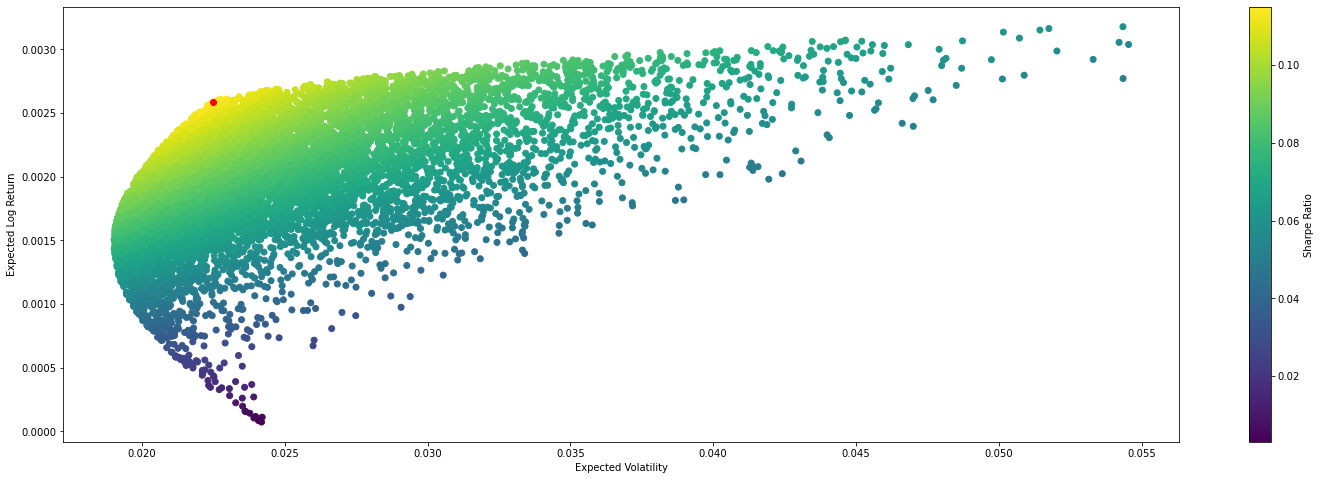

In [10]:
plt.figure(figsize=(25,8))
plt.scatter(expectedVolatility, expectedReturn,c=sharpeRatio)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Log Return")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex],c="red")

# Efficient Markowitz Frontier

            
minimize(w) -SR(w)

subject to  0=<w=<1,  i=1

In [11]:
def negativeSR(w):
    W=np.array(w)
    R=np.sum(meanLogRet*w)
    V=np.sqrt(np.dot(W.T, np.dot(Sigma,w)))
      np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    
    SR=R/V
    return -1*SR

def checkSumToOne(w):
    return np.sum(w)-1

w0=[0.25,0.25,0.25,0.25]
bounds=((0,1),(0,1),(0,1),(0,1))
constraints=({"type":"eq","fun":checkSumToOne})

w_opt=minimize(negativeSR,w0,method="SLSQP", bounds=bounds,constraints=constraints)

In [12]:
w_opt

     fun: -0.11544447630900892
     jac: array([ 0.00116947, -0.00017083, -0.0002838 ,  0.04725629])
 message: 'Optimization terminated successfully'
    nfev: 41
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.53648818e-01, 5.20862988e-01, 3.25488194e-01, 3.91939085e-17])